In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
import missingno as msno
import calendar

In [9]:
##Read data;
data=pd.read_csv(r"/real_1_Unemployment_Rate_upto_11_2020.csv")

In [10]:
#Print first five rows;
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [12]:
#Indetifiy the number of features;
len(data.columns)

9

In [13]:
#Indentify the features;
data.columns

Index(['Region', 'Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [14]:
#Indentify the shape of data:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 267
Number of Columns 9


In [15]:
#Indentify the datatype of features;
data.dtypes

Region                                       object
Date                                         object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [16]:
#Checking if dataset has a empty cell
data.isnull().sum().any()

False

In [17]:
#Indentify the number of empty cells;
data.isnull().sum()

Region                                      0
Date                                        0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

<Axes: >

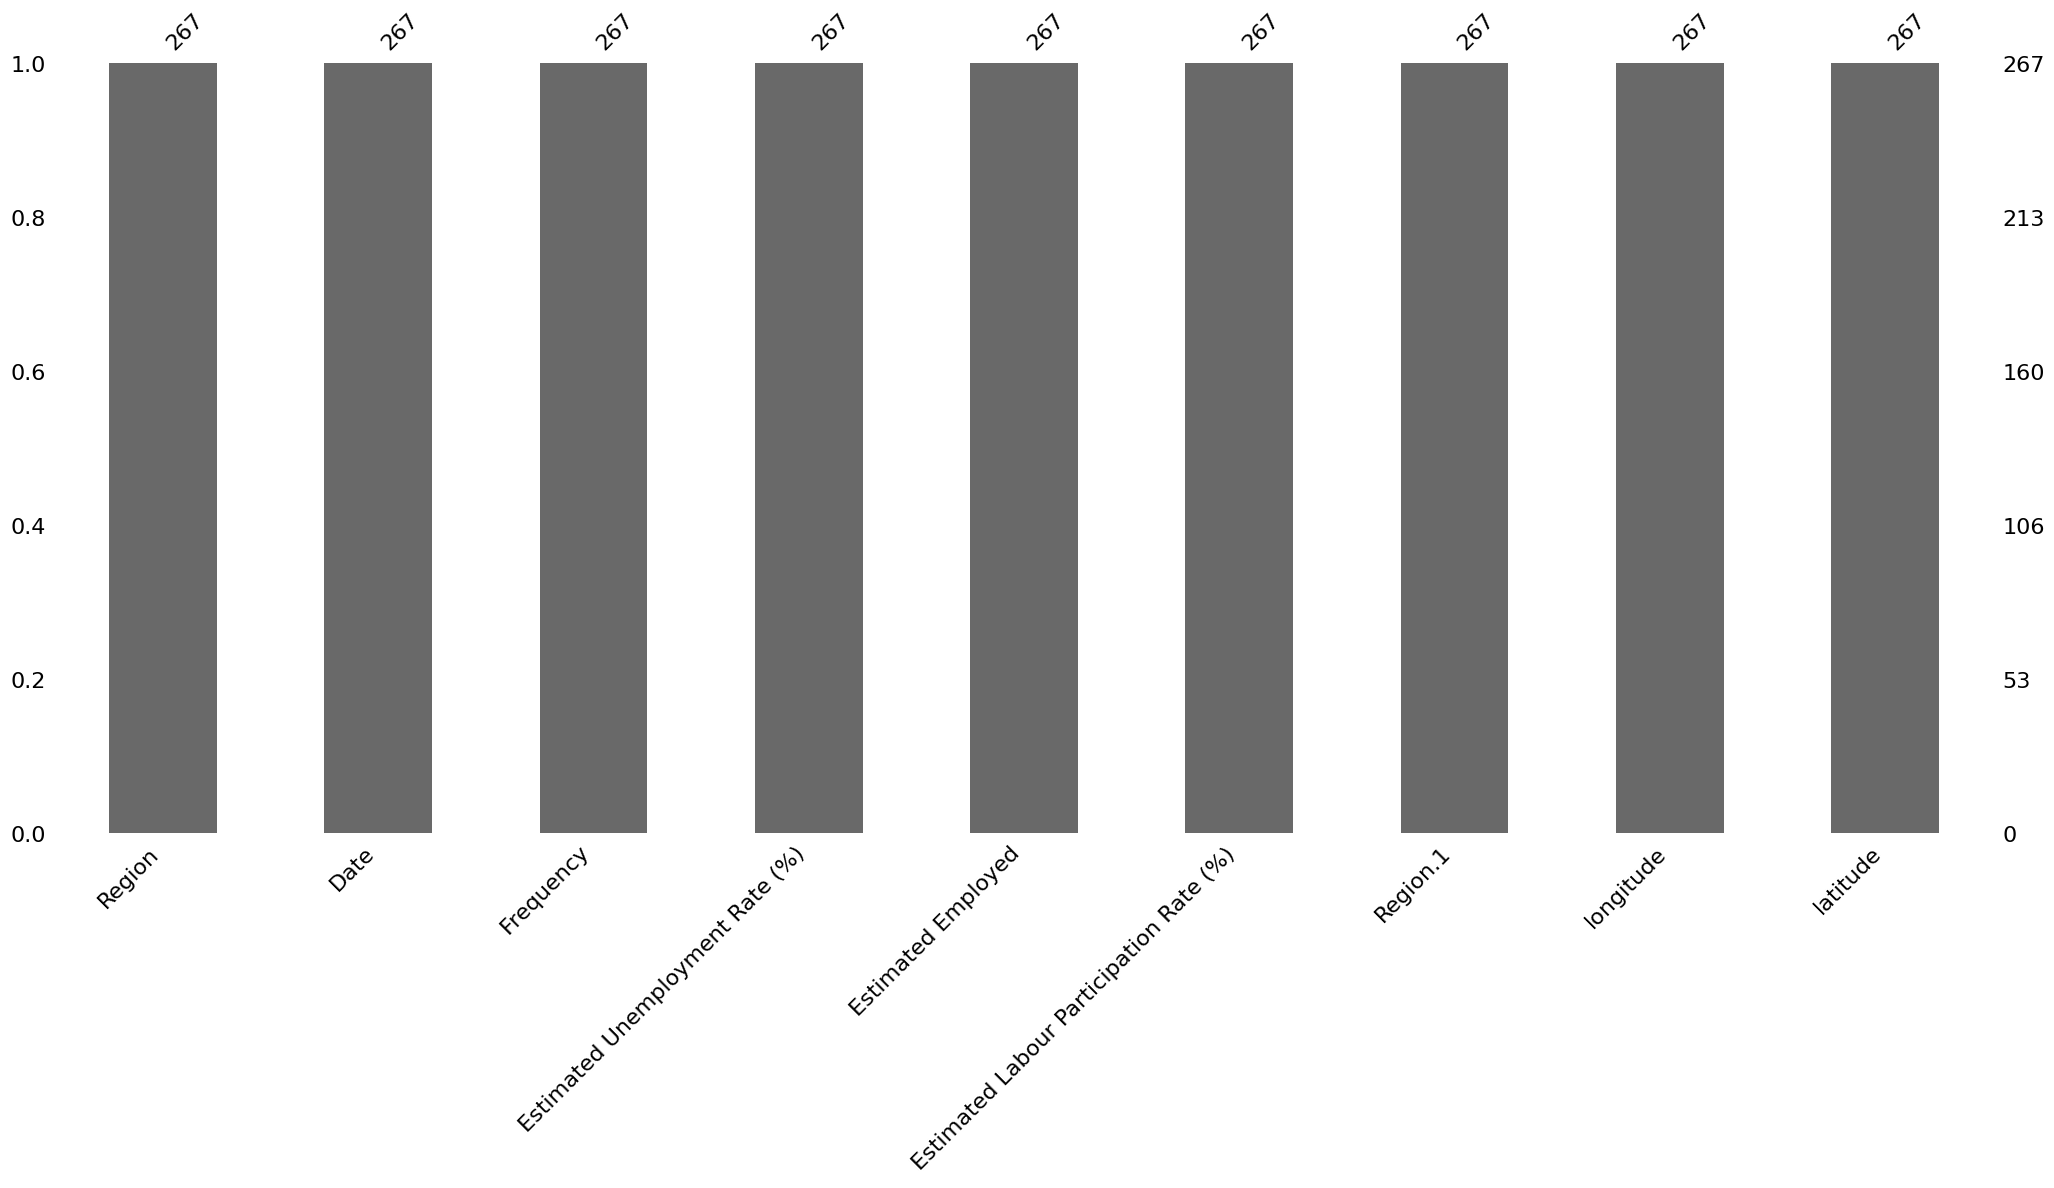

In [18]:
msno.bar(data)

In [19]:
##Information about the data;
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1   Date                                      267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [20]:
#Describe the data;
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [21]:
#Check how many regions;
data["Region.1"].value_counts()

North        79
South        60
West         50
East         40
Northeast    38
Name: Region.1, dtype: int64

In [22]:
#Rename same columns name;
data.rename(columns={"Region":"States","State":"Region"},inplace=True)

In [23]:
#Again change column name beacuse some special charatcer is here;
data.columns=["States","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Region","longitude","latitude"]

In [24]:
data.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude'],
      dtype='object')

In [25]:
#See unique states;
data.States.unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [26]:
data.States.value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: States, dtype: int64

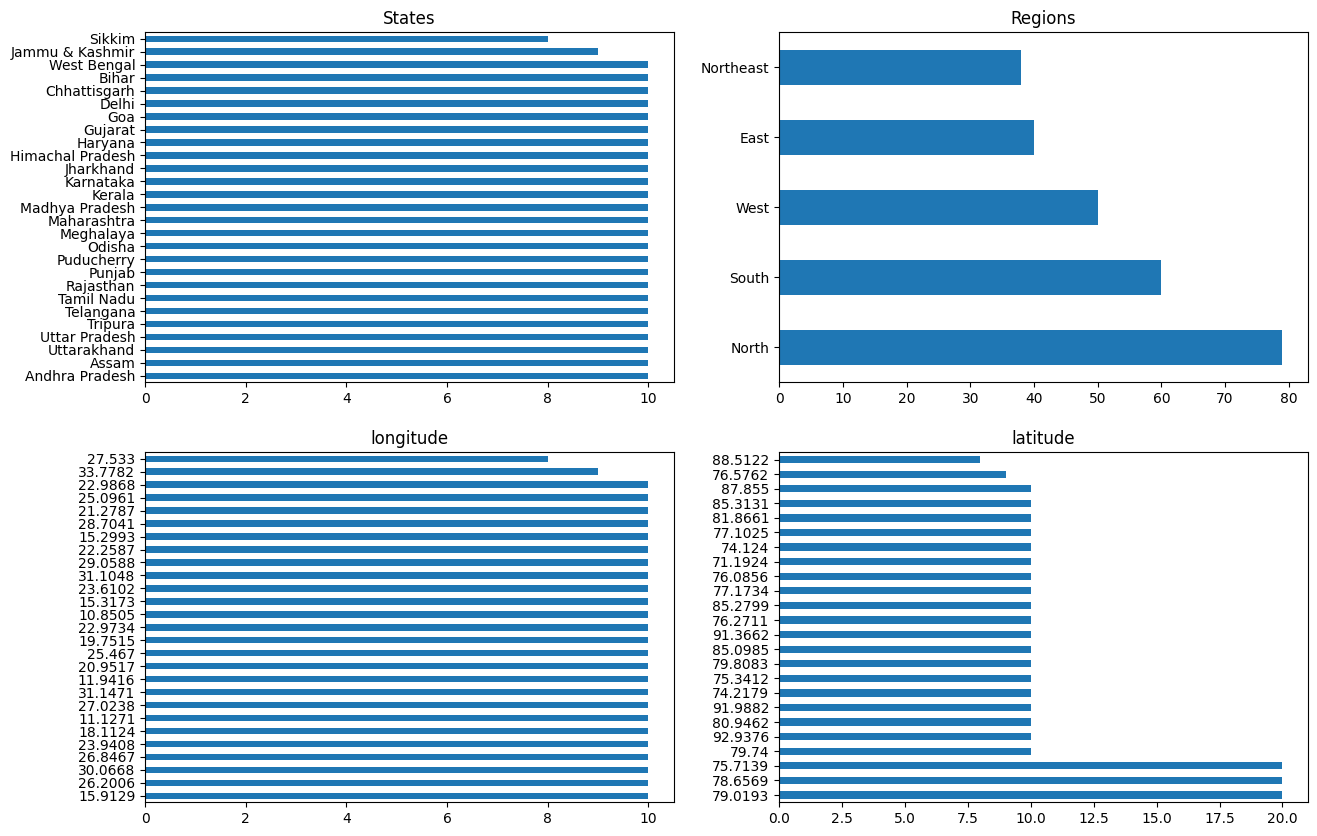

In [27]:
plt.figure(figsize=(15,10))

plt.subplot(221)

data["States"].value_counts().plot(kind="barh",title="States")

plt.xticks(rotation=0)

plt.subplot(222)

data["Region"].value_counts().plot(kind="barh",title="Regions")

plt.xticks(rotation=0)

plt.subplot(223)

data["longitude"].value_counts().plot(kind="barh",title="longitude")

plt.xticks(rotation=0)

plt.subplot(224)

data["latitude"].value_counts().plot(kind="barh",title="latitude")

plt.xticks(rotation=0)

plt.show()

In [28]:
#It will return day first and month then year;
data["Data"]=pd.to_datetime(data["Date"],dayfirst=True)

In [29]:
##It will return month integer format with new features month

data['month'] = pd.DatetimeIndex(data['Date']).month

In [30]:
#It will create new feature month_name
data["Month_name"]=data["month"].apply(lambda x:calendar.month_abbr[x])

In [31]:
data.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude', 'Data', 'month', 'Month_name'],
      dtype='object')

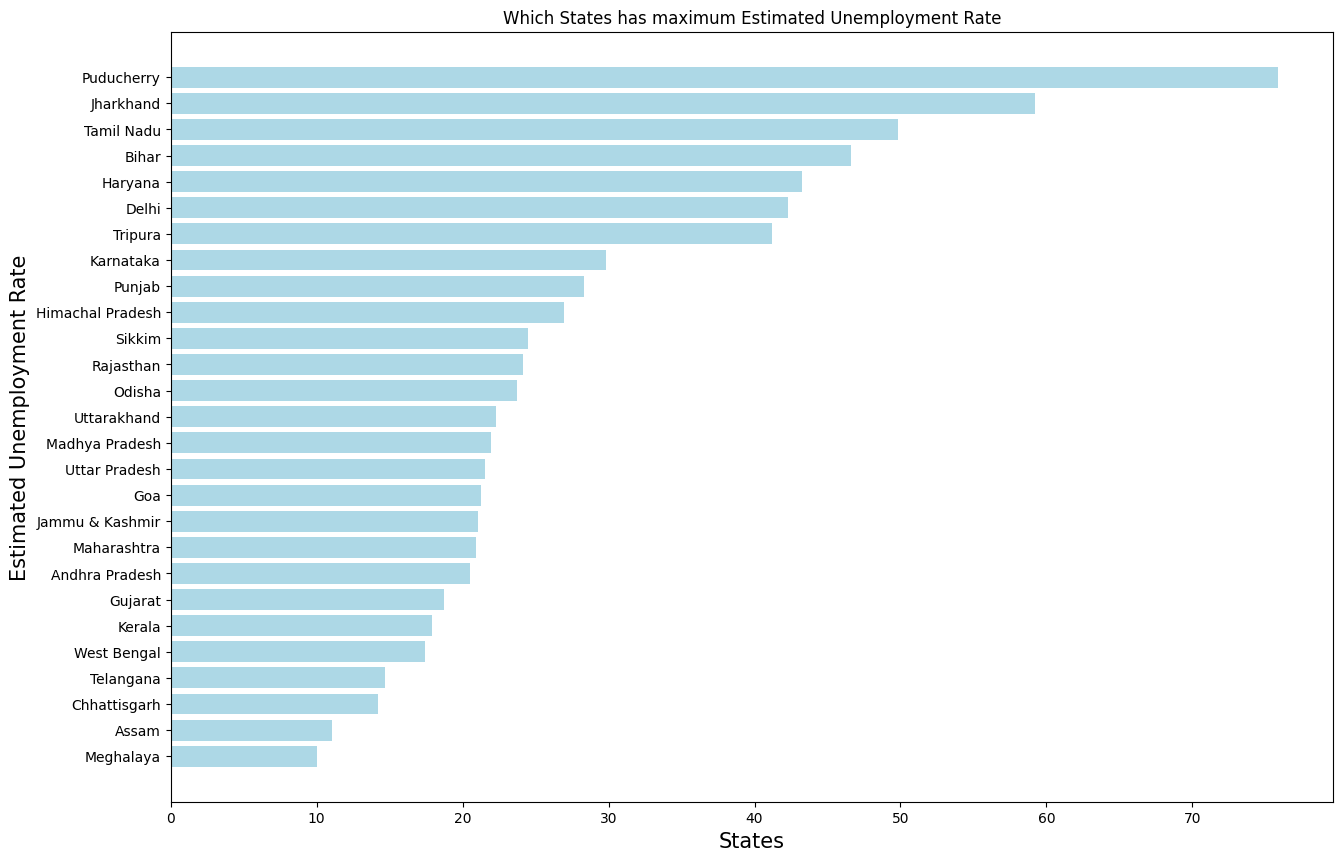

In [32]:
group=data.groupby(["States"])["Estimated Unemployment Rate"].max().sort_values(ascending=False).reset_index()
x=group["States"]
y=group["Estimated Unemployment Rate"]
y,x=zip(*sorted(zip(y,x)))
plt.figure(figsize=(15,10))
plt.barh(x,y,color="lightblue")
plt.xlabel("States",fontsize=15)
plt.ylabel("Estimated Unemployment Rate",fontsize=15)
plt.title("Which States has maximum Estimated Unemployment Rate")
plt.rcParams.update({"axes.facecolor":"black"})
plt.grid(False)
plt.show()

In [33]:
data.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude', 'Data', 'month', 'Month_name'],
      dtype='object')

In [34]:
fig=px.bar(data,x="States",y="Estimated Unemployment Rate",color="States",hover_data=["States"],animation_frame="Month_name",
           title="Which month is highest Estimated Unemployment Rate with States")
fig.show()

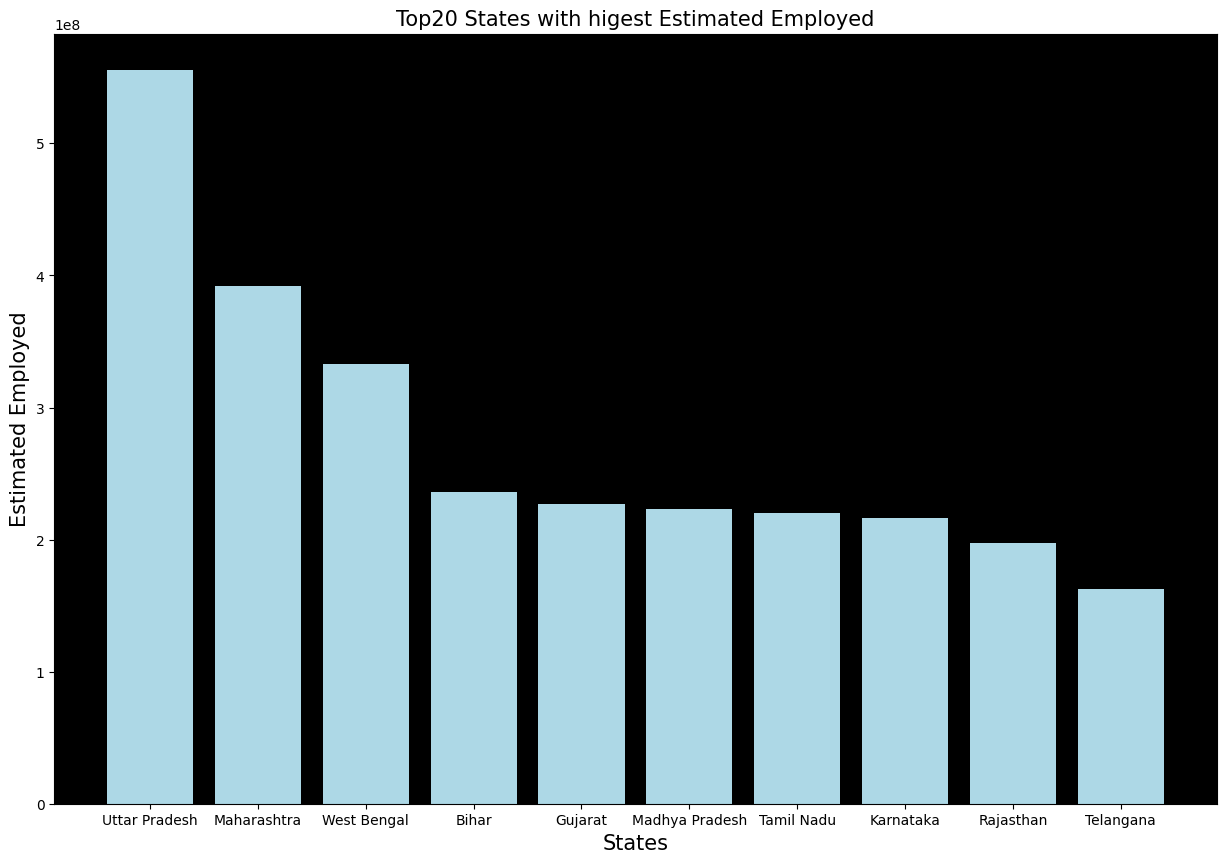

In [35]:
Estimated=data.groupby("States")["Estimated Employed"].sum().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(15,10))
plt.bar(Estimated["States"],Estimated["Estimated Employed"],color="lightblue")
plt.title("Top20 States with higest Estimated Employed",fontsize=15)
plt.xlabel("States",fontsize=15)
plt.ylabel("Estimated Employed",fontsize=15)
plt.rcParams.update({"axes.facecolor":"black"})
plt.grid(False)
plt.show()

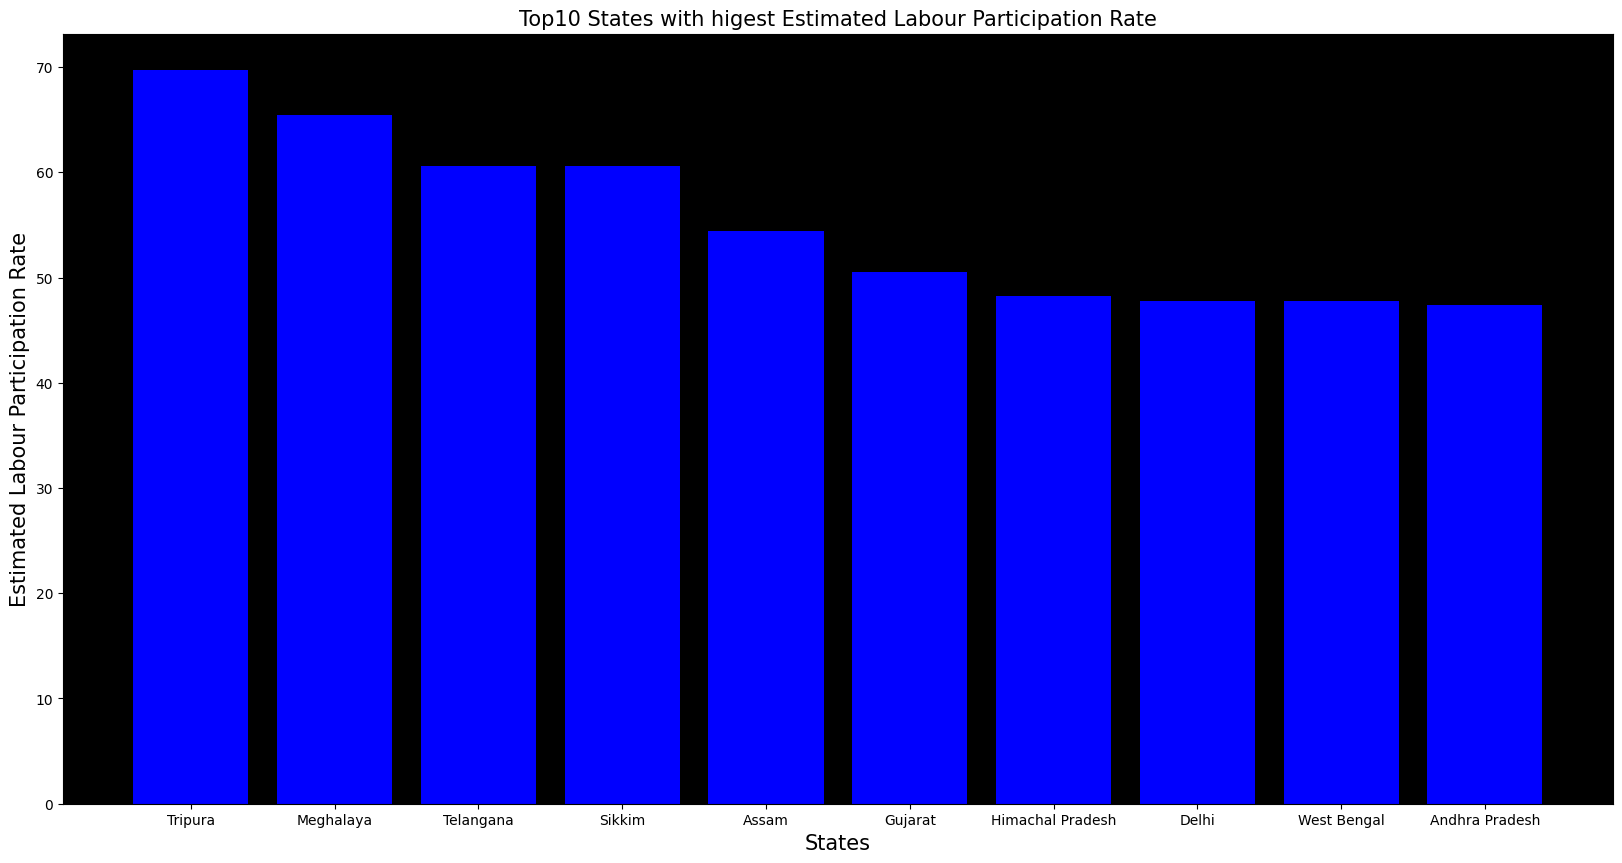

In [36]:
Estimated_rate=data.groupby("States")["Estimated Labour Participation Rate"].max().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(20,10))
plt.bar(Estimated_rate["States"],Estimated_rate["Estimated Labour Participation Rate"],color="blue")
plt.title("Top10 States with higest Estimated Labour Participation Rate",fontsize=15)
plt.xlabel("States",fontsize=15)
plt.ylabel("Estimated Labour Participation Rate",fontsize=15)
plt.rcParams.update({"axes.facecolor":"black"})
plt.grid(False)
plt.show()

In [37]:
data.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude', 'Data', 'month', 'Month_name'],
      dtype='object')

In [38]:
Estimated=data.groupby(["States","Region"])["Estimated Unemployment Rate"].mean().sort_values(ascending=False).reset_index()
fig=px.sunburst(Estimated,
               path=["Region","States"],
               values="Estimated Unemployment Rate",
               width=600,height=600,color_continuous_scale="RdYlGn",
               title="Unemployment Rate Each States and Regions")
fig.show()

In [39]:
fig=px.scatter_geo(data,"longitude","latitude",color="Region",
                  hover_name="States",size="Estimated Unemployment Rate",
                  animation_frame="Month_name",scope="asia",template="ggplot2",
                  title="Effact of lockdown on Employment across Regions")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"]=2000
fig.update_geos(lataxis_range=[5,35],lonaxis_range=[65,100])
fig.show()

In [40]:
fig=px.scatter(data,x="States",y="Estimated Unemployment Rate",color="Region",text="Month_name",width=500,height=700,
              title="Which State highest Unemployment Rate with Month_name and Region")
fig.show()

In [41]:
##Effect of unemployment after lockdown
after_lockdown=data[(data["month"]>=4) &(data["month"]<=7)]

In [42]:
#Befor lockdown;
before_lockdown=data[(data["month"]>=1) & (data["month"]<=4)]

In [43]:
after_lock = after_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

before_lock = before_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()


after_lock['Unemployment Rate before lockdown'] = before_lock['Estimated Unemployment Rate']
after_lock.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']

In [44]:
after_lock


,States,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,12.397500,9.4025
1,Assam,6.245000,6.2250
2,Bihar,30.802500,20.7425
3,Chhattisgarh,9.602500,7.2450
4,Delhi,24.360000,17.6975
5,Goa,15.397500,7.5650
6,Gujarat,8.965000,9.3225
7,Haryana,30.780000,28.5950
8,Himachal Pradesh,16.732500,13.6575
9,Jammu & Kashmir,15.846667,19.1200


In [45]:
x=after_lock["States"]
y=after_lock["Unemployment Rate before lockdown"]
z=after_lock["Unemployment Rate after lockdown"]
fig = go.Figure()
fig.add_trace(go.Bar(x=x,
                y=y,
                name='Unemployement Rate before lockdown',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=x,
                y=z,
                name='Unemployment Rate after lockdown',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='Unemployement Rate during Covid-19 & Before',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Percentage %',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)
fig.show()

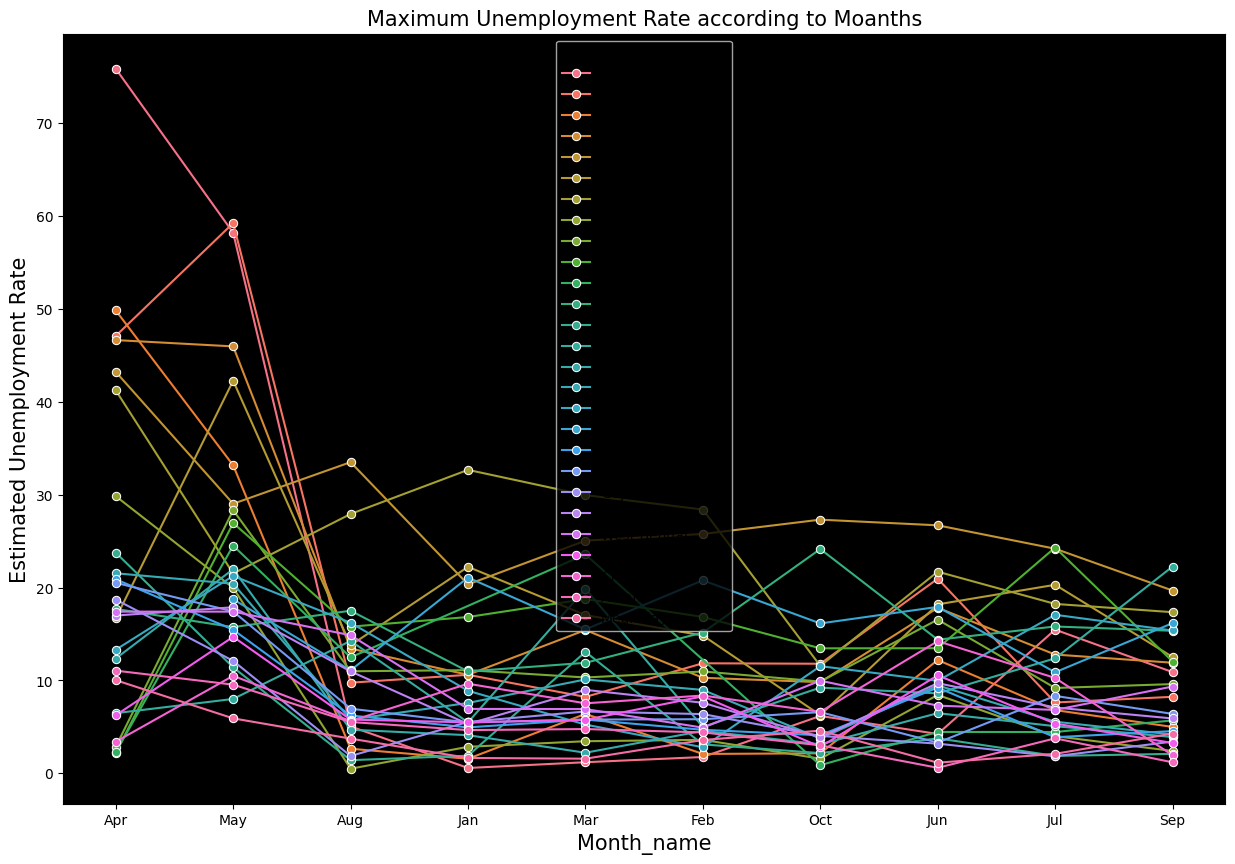

In [46]:
Unemployment =data.groupby(["States","Month_name"])["Estimated Unemployment Rate"].max().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,10))
sns.lineplot(data=Unemployment,x="Month_name",y="Estimated Unemployment Rate",hue='States',marker="o")
plt.title("Maximum Unemployment Rate according to Moanths",fontsize=15)
plt.xlabel("Month_name",fontsize=15)
plt.ylabel("Estimated Unemployment Rate",fontsize=15)
plt.rcParams.update({"axes.facecolor":"none"})
plt.show()

<ipython-input-47-339554e95c52>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



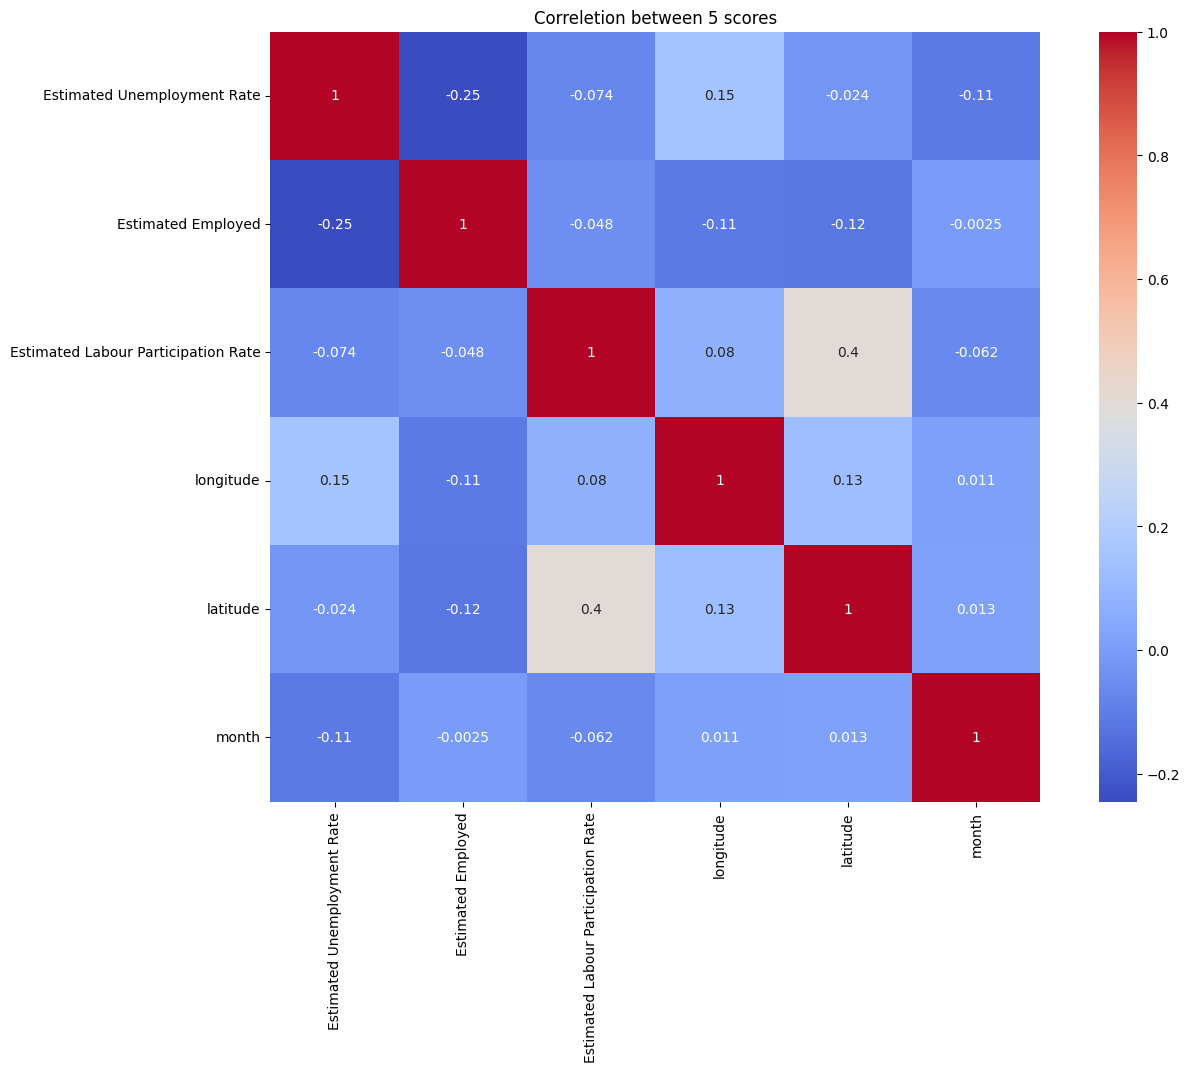

In [47]:
##Correlation
plt.figure(figsize=(15,10))
corr=data.corr()
sns.heatmap(corr,annot=True,square=True,cmap="coolwarm")
plt.title("Correletion between 5 scores")
plt.yticks(rotation=0)
plt.show()